# Titanic Survival Prediction

## Dataset: https://www.kaggle.com/c/titanic/overview

For this project I will use the steps in CRISP-DM, or Cross-Industry Standard Process for Data Mining. It is a widely-used framework for guiding data mining projects from start to finish.

## Step 1: Business Understanding

Let's predict what sorts of people on the Titanic were more likely to survive.

## Step 2: Data Understanding

### Import the packages you need

In [223]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Load the data

In [224]:
train_data_df = pd.read_csv("titanic_datasets/train.csv")
test_data_df = pd.read_csv("titanic_datasets/test.csv")

### View the data

In [225]:
train_data_df.shape

(891, 12)

In [226]:
train_data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [227]:
test_data_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Our target variable is Survived (we will change this column name later). 1 means they survived, 0 means they did not survive.

In [228]:
train_data_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [229]:
sum(train_data_df["Survived"]) / len(train_data_df)

0.3838383838383838

About 38% of the people in the dataset survived, slightly imbalanced but nothing that will make it difficult for us to make a good model.

## Step 3: Data Preparation

### Clean up the data

Now we can start cleaning up the dataframes so they're easier to work with, and give us more accurate results.

In [230]:
for df in [train_data_df, test_data_df]:
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    string_columns = list(df.dtypes[df.dtypes == "object"].index)
    for column in string_columns:
        df[column] = df[column].str.lower().str.replace(" ", "_")

In [231]:
train_data_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"braund,_mr._owen_harris",male,22.0,1,0,a/5_21171,7.2500,NaN,s
1,2,1,1,"cumings,_mrs._john_bradley_(florence_briggs_th...",female,38.0,1,0,pc_17599,71.2833,c85,c
2,3,1,3,"heikkinen,_miss._laina",female,26.0,0,0,ston/o2._3101282,7.9250,NaN,s
3,4,1,1,"futrelle,_mrs._jacques_heath_(lily_may_peel)",female,35.0,1,0,113803,53.1000,c123,s
4,5,0,3,"allen,_mr._william_henry",male,35.0,0,0,373450,8.0500,NaN,s


Let's create a function to view the values in each column.

In [232]:
def display_column_value_counts(df):
    for column in df.columns:
        display(df[column].value_counts().sort_index())
        print("\n")

In [233]:
display_column_value_counts(train_data_df)

passengerid
1      1
2      1
3      1
4      1
5      1
      ..
887    1
888    1
889    1
890    1
891    1
Name: count, Length: 891, dtype: int64

survived
0    549
1    342
Name: count, dtype: int64

pclass
1    216
2    184
3    491
Name: count, dtype: int64

name
abbing,_mr._anthony                       1
abbott,_mr._rossmore_edward               1
abbott,_mrs._stanton_(rosa_hunt)          1
abelson,_mr._samuel                       1
abelson,_mrs._samuel_(hannah_wizosky)     1
                                         ..
yousseff,_mr._gerious                     1
yrois,_miss._henriette_("mrs_harbeck")    1
zabour,_miss._hileni                      1
zabour,_miss._thamine                     1
zimmerman,_mr._leo                        1
Name: count, Length: 891, dtype: int64

sex
female    314
male      577
Name: count, dtype: int64

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64

parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64

ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
w./c._6608     4
w./c._6609     1
w.e.p._5734    1
w/c_14208      1
we/p_5735      2
Name: count, Length: 681, dtype: int64

fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: count, Length: 248, dtype: int64

cabin
a10      1
a14      1
a16      1
a19      1
a20      1
        ..
f_e69    1
f_g63    1
f_g73    2
g6       4
t        1
Name: count, Length: 147, dtype: int64

embarked
c    168
q     77
s    644
Name: count, dtype: int64

Some findings:

- passengerid is purely unique values, so we can remove it since we can't group people by a specific passengerid
- same with the name column ^
- we could break up the age column into groups and then drop the age column, let's view it with a histogram later
- sibsp is how many siblings and spouses the person has, parch is how many children and parents the person has, we can group them into a familysize column and remove sibsp and parch
- for ticket, we can group them by the first character in each ticket
- we can also break up the fare column into groups, let's view it with a histogram later
- cabin is mostly empty values, and the values that are there are all unique, so we can remove this column

Let's clean up the data now.

First, we remove the columns that offer little to our model.

We will need the passengerid column of the test dataframe at the end, so let's save it as a Pandas series.

In [234]:
passenger_id = test_data_df["passengerid"]

In [235]:
def drop_columns(df):
    df = df.drop("passengerid", axis=1)
    df = df.drop("name", axis=1)
    df = df.drop("cabin", axis=1)
    return df

train_data_df, test_data_df = drop_columns(train_data_df), drop_columns(test_data_df)

Next, let's look at histograms and manage the age and fare columns.

<Axes: xlabel='age', ylabel='Count'>

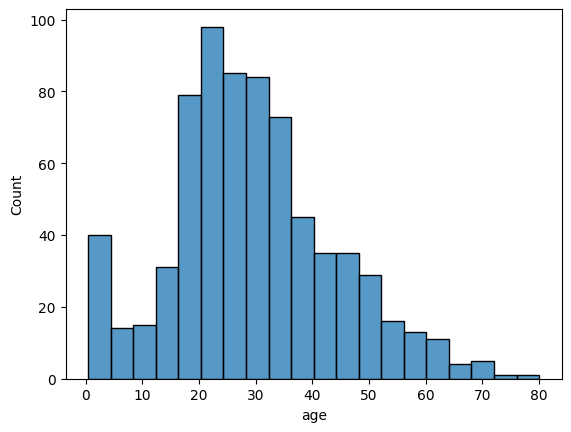

In [236]:
sns.histplot(train_data_df["age"])

Age can be split up by 0 to 21, 21 to 50, and 50+. (The life expectancy in 1912 when the Titanic sank was in the mid 50s: https://u.demog.berkeley.edu/~andrew/1918/figure2.html).

In [237]:
def create_agegroup_column(df):
    df["agegroup"] = ["child" if age <= 21 else "adult" if age <= 50 else "other" for age in df["age"]]
    df = df.drop("age", axis=1)
    return df

train_data_df, test_data_df = create_agegroup_column(train_data_df), create_agegroup_column(test_data_df)

<Axes: xlabel='fare', ylabel='Count'>

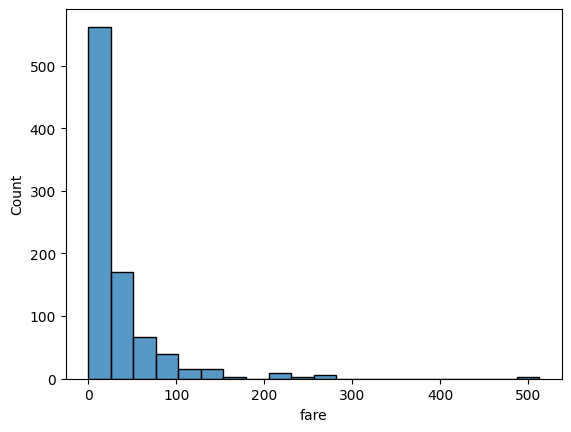

In [238]:
sns.histplot(train_data_df["fare"], bins=20)

Fare can be split up by 0 to 25, 25 to 100, and 100+. (These are just groups I made up).

In [239]:
def create_fareclass_column(df):
    df["fareclass"] = ["basic" if fare <= 25 else "premium" if fare <= 100 else "luxury" for fare in df["fare"]]
    df = df.drop("fare", axis=1)
    return df

train_data_df, test_data_df = create_fareclass_column(train_data_df), create_fareclass_column(test_data_df)

Now, we can make the familysize column and remove sibsp and parch.

In [240]:
def create_familysize_column(df):
    df["familysize"] = df["sibsp"] + df["parch"]
    df = df.drop("sibsp", axis=1)
    df = df.drop("parch", axis=1)
    return df

train_data_df, test_data_df = create_familysize_column(train_data_df), create_familysize_column(test_data_df)

Finally, let's group the ticket column by the first character in each ticket.

In [241]:
def create_familysize_column(df):
    df["ticket"] = df["ticket"].str[0]
    return df

train_data_df, test_data_df = create_familysize_column(train_data_df), create_familysize_column(test_data_df)

Now that the data is cleaned up, let's see if there's any missing rows.

In [242]:
train_data_df.isnull().sum()

survived      0
pclass        0
sex           0
ticket        0
embarked      2
agegroup      0
fareclass     0
familysize    0
dtype: int64

We can drop the people with no embarked value since it's only two person.

In [243]:
train_data_df = train_data_df.dropna(subset=["embarked"])

Let's look at the data again and see if we forgot anything.

In [244]:
display_column_value_counts(train_data_df)

survived
0    549
1    340
Name: count, dtype: int64

pclass
1    214
2    184
3    491
Name: count, dtype: int64

sex
female    312
male      577
Name: count, dtype: int64

ticket
1    144
2    183
3    301
4     10
5      3
6      6
7      9
8      2
9      1
a     29
c     47
f      7
l      4
p     65
s     65
w     13
Name: count, dtype: int64

embarked
c    168
q     77
s    644
Name: count, dtype: int64

agegroup
adult    445
child    204
other    240
Name: count, dtype: int64

fareclass
basic      557
luxury      53
premium    279
Name: count, dtype: int64

familysize
0     535
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64

In [245]:
train_data_df.dtypes

survived       int64
pclass         int64
sex           object
ticket        object
embarked      object
agegroup      object
fareclass     object
familysize     int64
dtype: object

It looks good. Now the dataframe is cleaned up and ready for us to start our modeling.

## Step 4: Modeling

We already have train and test dataframes, but let's split the train dataframe into train and validation. The validation dataframe will be used to evaluate the model's performance during training and to fine-tune the model.

In [246]:
train_data_split_df, validation_data_split_df = train_test_split(train_data_df, test_size=0.2, random_state=1)

y_train = train_data_split_df["survived"].values
y_validation = validation_data_split_df["survived"].values

del train_data_split_df["survived"]
del validation_data_split_df["survived"]

Removing the target variable is an optional step, but it's helpful to make sure that we don't use it when training a model.

We can use encoding methods to see which features may be important for our model. We can't just take a categorical variable and put it into a machine learning model, since models can only work with numbers in matrices. Let's convert the categorical values into a matrix form by encoding them.

In [247]:
categorical = ["sex", "ticket", "embarked", "agegroup", "fareclass"]
numerical = ["pclass", "familysize"]

Let's calculate the survival rate for the categorical variables.

In [248]:
global_mean = train_data_df["survived"].mean()

for column in categorical:
    df_group = train_data_df.groupby(by=column)["survived"].agg(["mean"])
    df_group["diff"] = df_group["mean"] - global_mean
    df_group["risk"] = df_group["mean"] / global_mean
    display(df_group)

,mean,diff,risk
sex,,,
female,0.740385,0.357932,1.935888
male,0.188908,-0.193544,0.493939


,mean,diff,risk
ticket,,,
1,0.625000,0.242548,1.634191
2,0.464481,0.082029,1.214481
3,0.239203,-0.143250,0.625445
4,0.200000,-0.182452,0.522941
5,0.000000,-0.382452,0.000000
6,0.166667,-0.215786,0.435784
7,0.111111,-0.271341,0.290523
8,0.000000,-0.382452,0.000000
9,1.000000,0.617548,2.614706


,mean,diff,risk
embarked,,,
c,0.553571,0.171119,1.447426
q,0.389610,0.007158,1.018717
s,0.336957,-0.045496,0.881042


,mean,diff,risk
agegroup,,,
adult,0.404494,0.022042,1.057634
child,0.426471,0.044018,1.115095
other,0.304167,-0.078286,0.795306


,mean,diff,risk
fareclass,,,
basic,0.287253,-0.095199,0.751082
luxury,0.735849,0.353397,1.924029
premium,0.505376,0.122924,1.321410


It seems that sex will be the most important variable for us because females are much more likely to survive than males. ticket, embarked, and fareclass also have some good values that can tell us if someone is likely to have survived. agegroup is a bit helpful, but not like the other variables.

In [249]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, train_data_df["survived"])

df_mi = train_data_df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name="MI")
df_mi

,MI
sex,0.149725
ticket,0.067663
fareclass,0.037592
embarked,0.014547
agegroup,0.005055


Higher values of mutual information mean a higher degree of dependence for the target. The table above shows that our assumptions for this analysis were correct.

In [250]:
train_data_df[categorical].nunique()

sex           2
ticket       16
embarked      3
agegroup      3
fareclass     3
dtype: int64

The sex, embarked, agegroup, and fareclass columns have few unique values, so let's use one-hot encoding for them. It's generally recommended to use one-hot encoding for categorical variables with fewer than 10-15 unique values. For the ticket variable, we will do target encoding.

Let's split up the categorical array into 2 arrays, one with the columns that'll be used for one-hot encoding, and another for the columns that'll be used for target encoding. We can create a function to help us encode dataframes. We can use the mean values from df_train_full["depression"] to do the target encoding for "city" and "degree" in the specified df. It's common to do this when you don't have the target variable in your training data, but you do have it in a larger dataset.

In [251]:
categorical_one_hot_encoding = ["sex", "embarked", "agegroup", "fareclass"]
categorical_target_encoding = ["ticket"]

def encode_dataframe(df, target_variable):
    df_encoded = pd.get_dummies(df, columns=categorical_one_hot_encoding)

    for category in categorical_target_encoding:
        category_means = train_data_df.groupby(category)[target_variable].mean()
        df_encoded[category] = df[category].map(category_means)
    
    return df_encoded

Now, we can start using logistic regression, and get the training and validation datasets and compare them.

In [252]:
X_train = encode_dataframe(train_data_split_df, "survived")
X_train

,pclass,ticket,familysize,sex_female,sex_male,embarked_c,embarked_q,embarked_s,agegroup_adult,agegroup_child,agegroup_other,fareclass_basic,fareclass_luxury,fareclass_premium
121,3,0.068966,0,False,True,False,False,True,False,False,True,True,False,False
687,3,0.239203,0,False,True,False,False,True,False,True,False,True,False,False
790,3,0.625000,0,False,True,False,True,False,False,False,True,True,False,False
837,3,0.239203,0,False,True,False,False,True,False,False,True,True,False,False
659,1,0.239203,2,False,True,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,1,0.646154,0,True,False,True,False,False,True,False,False,False,True,False
768,3,0.239203,1,False,True,False,True,False,False,False,True,True,False,False
73,3,0.464481,1,False,True,True,False,False,True,False,False,True,False,False
236,2,0.464481,1,False,True,False,False,True,True,False,False,False,False,True


In [253]:
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, y_train)

X_validation = encode_dataframe(validation_data_split_df, "survived")
y_prediction = model.predict_proba(X_validation)[:, 1]

## Step 5: Evaluation

Let's start getting some metrics to see how good this model is.

Getting the accuracy on the validation dataset is easy, we just get the fraction of correct predictions.

In [254]:
accuracy_score(y_validation, y_prediction >= 0.5)

0.8314606741573034

The model is 83.1% accurate, we're doing well.

Now we can loop over different thresholds and check which one gives the best accuracy.

In [255]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for threshold in thresholds:
    accuracy = accuracy_score(y_validation, y_prediction >= threshold)
    accuracies.append(accuracy)
    print("%0.2f %0.3f" % (threshold, accuracy))

0.00 0.410
0.05 0.427
0.10 0.567
0.15 0.635
0.20 0.736
0.25 0.781
0.30 0.798
0.35 0.831
0.40 0.826
0.45 0.837
0.50 0.831
0.55 0.843
0.60 0.837
0.65 0.820
0.70 0.803
0.75 0.781
0.80 0.725
0.85 0.708
0.90 0.691
0.95 0.596
1.00 0.590


Using the threshold of 0.55 gives us the best accuracy score. Typically, 0.5 is a good threshold value to start off with, but always check other threshold values. We can use Matplotlib to create a plot that shows how accuracy changes depending on the threshold.

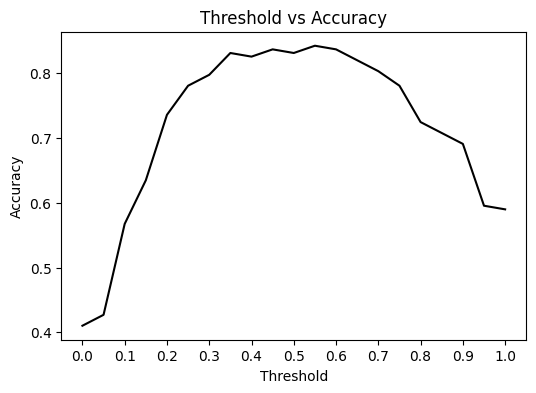

In [256]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color="black")

plt.title("Threshold vs Accuracy")
plt.xlabel("Threshold")
plt.ylabel("Accuracy")

plt.xticks(np.linspace(0, 1, 11))

plt.show()

Let's use ROC AUC to evaluate the performance of our model.

In [257]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_validation, y_prediction)

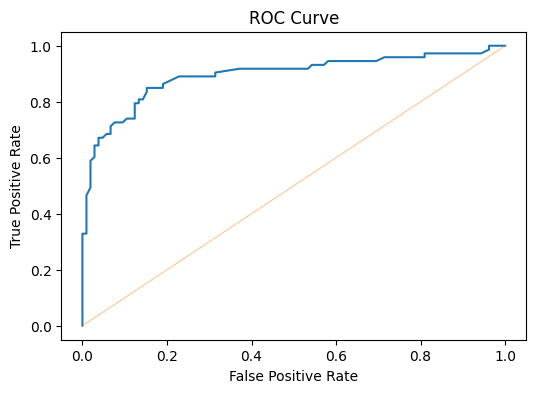

In [258]:
plt.figure(figsize=(6, 4))

plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1], lw=0.7, alpha=0.5)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.title("ROC Curve")

plt.show()

In [259]:
roc_auc_score(y_validation, y_prediction)

np.float64(0.8947162426614481)

The ROC Curve plot and the ROC AUC score both look good. Now we can test the model using a new dataframe.

## Step 6: Deployment

Using 0.55 as our threshold, let's get the probability of surviving of each person in the test dataframe.

In [260]:
threshold = 0.55
X_test_validation = encode_dataframe(test_data_df, "survived")
y_test_prediction = model.predict_proba(X_test_validation)[:, 1]
(y_test_prediction >= threshold).mean()

np.float64(0.3349282296650718)

33.5% of the people in the test dataset are expected to survive, this is not far off from the training dataset.

In [261]:
y_test_prediction[:10]

array([0.1551119 , 0.50890004, 0.22507651, 0.09400401, 0.46599468,
       0.130082  , 0.68526606, 0.21552097, 0.84737779, 0.08875924])

The prediction array contains floats when it should only contain binary values, let's update the array.

In [262]:
y_test_prediction = (y_test_prediction >= threshold).astype(int)

In [263]:
y_test_prediction[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

Now let's create the submission csv file so we can finish this model and prediction.

We will need to create a csv file with 2 columns, PassengerId and Survived.

Let's create a dataframe with the 2 columns.

In [264]:
output_df = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": y_test_prediction
})
output_df.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


Now that we have our output dataframe, let's save it as a file.

In [265]:
output_df.to_csv("submission.csv", index=False)

We have our submission csv file, and now we are done.

Let's get the submission files for various thresholds.

In [297]:
for _ in np.linspace(0.35, 0.90, num=12):
    pd.DataFrame({
        "PassengerId": passenger_id,
        "Survived": (model.predict_proba(X_test_validation)[:, 1] >= _).astype(int)
    }).to_csv(f"submission_{round(_, 2)}.csv", index=False)